In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

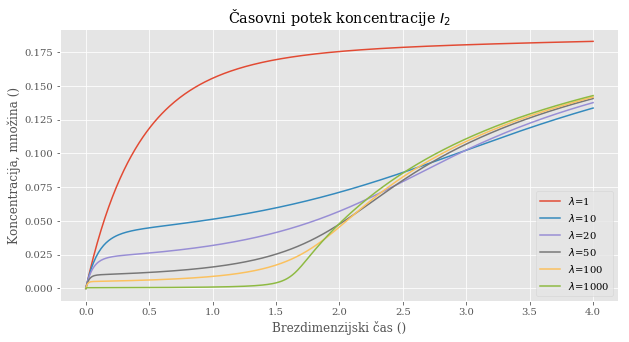

In [47]:
def eksaktno(lambd,
             A_0 = 0.6, #S208
             B_0 = 0.7,   #I
             D_0 = 0,   #I2
             G_0 = 0.8,   #S2O3
             
             ND=4, #Čas opazovanja
             TS=1e-2 #Korak
            ):
    INPUT = np.array([A_0,B_0,D_0,G_0])
    p1 =1
    p2 = lambd * p1

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((4))
        V = INP
        Y[0] = -p1 * V[0] * V[1] #A
        Y[1] = -2*p1*V[0]*V[1]+2*p2*V[2]*V[3]  #B
        Y[2] =  p1 *V[0]*V[1]-p2*V[2]*V[3]#D
        Y[3] = -2*p2*V[2]*V[3]  #G
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return RES, t_range


plt.figure(figsize=(10,5))
for l in [1, 10, 20, 50, 100, 1000]:
    RES, t_range = eksaktno(l)
    plt.plot(t_range, RES[:,2], label=r"$\lambda$={}".format(l))

plt.title(r"Časovni potek koncentracije $I_2$")
plt.ylabel("Koncentracija, množina ()")
plt.xlabel("Brezdimenzijski čas ()")
#plt.plot(t_range, RES[:,0], label="A")
#plt.plot(t_range, RES[:,1], label="B")
#plt.plot(t_range, RES[:,2], label="D")
#plt.plot(t_range, RES[:,3], label="G")
plt.legend()
plt.savefig("lambde4.pdf")
plt.savefig("lambde4.jpg")
plt.show()

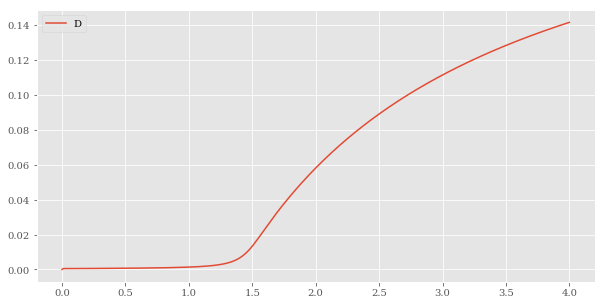

In [35]:
%who

FloatSlider	 RES	 a	 b	 c	 eksaktno	 fixed	 interact	 interact_manual	 
interactive	 np	 odeint	 pd	 plt	 print_function	 t_range	 widgets	 
